<a href="https://colab.research.google.com/github/ahmedelsayed16112002/Graduation_project/blob/main/Student_Performance_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('data.csv',delimiter=';')

# Outliers


Column: Previous qualification (grade)
Lower Bound (1st percentile): 100.00
Upper Bound (99th percentile): 170.00
Number of Outliers: 33
Outlier Indices: [139, 142, 341, 349, 399, 524, 577, 660, 702, 1046, 1215, 1533, 1555, 1591, 1888, 2124, 2129, 2205, 2221, 2262, 2375, 2431, 2511, 2564, 2990, 3103, 3109, 3152, 3317, 3813, 3943, 3944, 4422]
Outlier Values: [178.0, 99.0, 188.0, 96.0, 96.0, 180.0, 172.0, 180.0, 190.0, 175.0, 176.0, 180.0, 97.0, 172.0, 184.4, 174.0, 182.0, 180.0, 99.0, 178.0, 95.0, 172.0, 190.0, 172.0, 172.0, 180.0, 177.0, 177.0, 172.0, 180.0, 180.0, 180.0, 180.0]

Column: Admission grade
Lower Bound (1st percentile): 99.00
Upper Bound (99th percentile): 166.83
Number of Outliers: 88
Outlier Indices: [82, 139, 166, 228, 339, 341, 359, 399, 417, 524, 554, 602, 660, 688, 702, 709, 717, 722, 867, 921, 1002, 1126, 1163, 1177, 1184, 1215, 1239, 1254, 1283, 1326, 1357, 1370, 1487, 1493, 1521, 1527, 1533, 1555, 1606, 1617, 1673, 1733, 1744, 1767, 1778, 1873, 1888, 2013, 2024, 

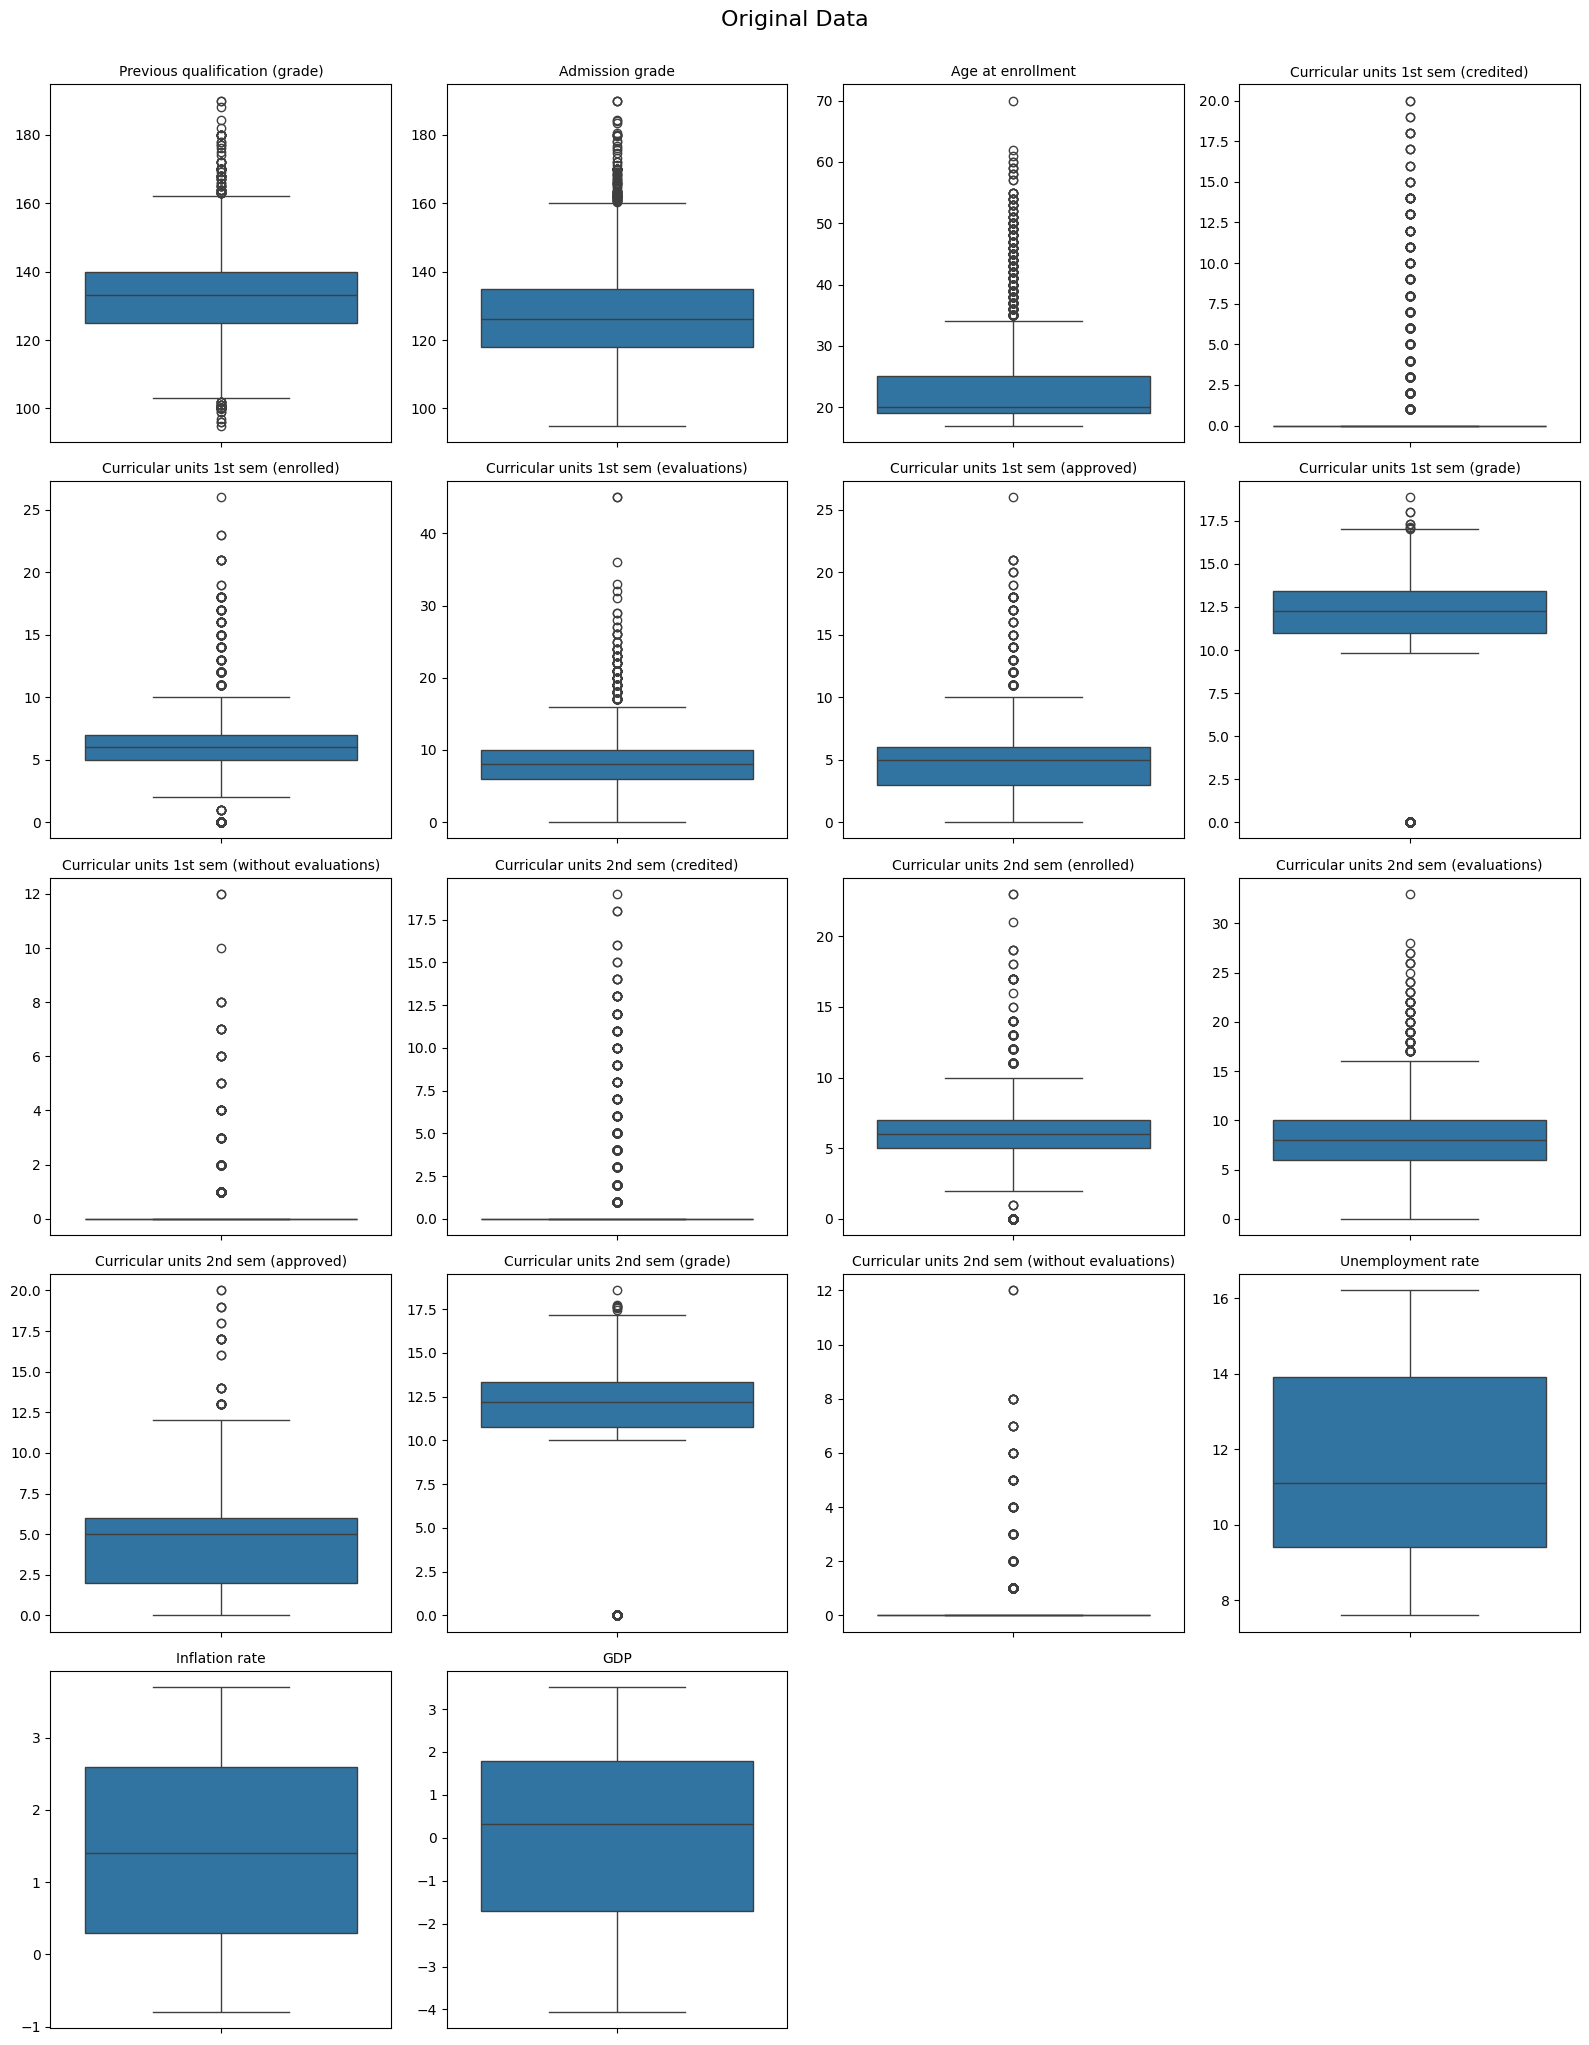

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Function to detect outliers using percentiles
def detect_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    outliers = {}
    for col in columns:
        lower_bound = np.percentile(df[col], lower_percentile)
        upper_bound = np.percentile(df[col], upper_percentile)

        # Identify outliers
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_indices': list(outlier_indices),
            'outlier_values': df.loc[outlier_indices, col].tolist()
        }

    return outliers

# Function to visualize outliers using boxplots in a single figure
def visualize_outliers_combined(df, columns, title="Boxplots of Numerical Columns"):
    n_cols = len(columns)
    n_cols_per_row = 4
    n_rows = math.ceil(n_cols / n_cols_per_row)

    plt.figure(figsize=(n_cols_per_row * 4, n_rows * 4))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols_per_row, i)
        sns.boxplot(y=df[col])
        plt.title(col, fontsize=10)
        plt.ylabel('')
        plt.tight_layout()

    plt.suptitle(title, fontsize=16, y=1.02)

# Assuming your DataFrame is called 'df'
# Replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# Select numerical columns
numerical_columns = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Step 1: Detect outliers using percentiles on original data
outliers_percentile = detect_outliers_percentile(df, numerical_columns, lower_percentile=1, upper_percentile=99)

# Step 2: Print outliers
for col, info in outliers_percentile.items():
    if info['outlier_indices']:
        print(f"\nColumn: {col}")
        print(f"Lower Bound (1st percentile): {info['lower_bound']:.2f}")
        print(f"Upper Bound (99th percentile): {info['upper_bound']:.2f}")
        print(f"Number of Outliers: {len(info['outlier_indices'])}")
        print(f"Outlier Indices: {info['outlier_indices']}")
        print(f"Outlier Values: {info['outlier_values']}")

# Step 3: Visualize the original data with boxplots
visualize_outliers_combined(df, numerical_columns, title="Original Data")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

# Function to visualize data using boxplots in a single figure
def visualize_data_combined(df, columns, title="Boxplots of Numerical Columns"):
    n_cols = len(columns)
    n_cols_per_row = 4
    n_rows = math.ceil(n_cols / n_cols_per_row)

    plt.figure(figsize=(n_cols_per_row * 4, n_rows * 4))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols_per_row, i)
        sns.boxplot(y=df[col])
        plt.title(col, fontsize=10)
        plt.ylabel('')
        plt.tight_layout()

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.savefig(f'boxplots_{title.lower().replace(" ", "_")}.png')
    plt.close()

# Assuming your DataFrame is called 'df'
# Replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# Select numerical columns (same as those with identified outliers)
numerical_columns = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Step 1: Create a copy of the DataFrame for handling outliers
df_processed = df.copy()

# Step 2: Cap outliers at the 1st and 99th percentiles (Winsorizing)
for col in numerical_columns:
    lower_bound = np.percentile(df_processed[col], 1)
    upper_bound = np.percentile(df_processed[col], 99)
    df_processed[col] = winsorize(df_processed[col], limits=(0.01, 0.01))

# Step 3: Apply log transformation to skewed columns
skewed_columns = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)'
]
for col in skewed_columns:
    # Use log1p to handle zeros; store in a new column
    df_processed[col + '_log'] = np.log1p(df_processed[col])
    # Drop the original column to avoid redundancy
    numerical_columns.remove(col)
    numerical_columns.append(col + '_log')

# Step 4: Handle zero-inflated columns by creating binary flags
zero_inflated_columns = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)'
]
for col in zero_inflated_columns:
    # Create a binary flag (1 if value > 0, else 0)
    flag_col = f'has_{col.replace(" ", "_").lower()}'
    df_processed[flag_col] = (df_processed[col + '_log'] > 0).astype(int)

# Step 5: Apply robust scaling to numerical columns
scaler = RobustScaler()
# Update numerical columns to reflect transformed columns
numerical_columns_transformed = [
    col + '_log' if col in zero_inflated_columns else col
    for col in numerical_columns
]
# Scale the transformed numerical columns
df_processed[numerical_columns_transformed] = scaler.fit_transform(df_processed[numerical_columns_transformed])

# Step 6: Visualize the processed data
visualize_data_combined(df_processed, numerical_columns_transformed, title="Processed Data for Modeling")

# The processed DataFrame 'df_processed' is now ready for modeling
# It includes capped values, log-transformed columns, binary flags for zero-inflated columns, and robustly scaled features

# Student Performance Analysis with GPA Prediction

This notebook performs three key tasks on student performance data:
1. **Clustering for Student Segmentation**: Groups students into clusters (e.g., at-risk, high-achievers) based on demographic, academic, and socioeconomic features.
2. **GPA Prediction (Regression)**: Predicts students’ GPA on a 0–4 scale using regression models.
3. **Student Outcome Classification**: Classifies students into outcomes (Dropout, Enrolled, Graduate) to predict academic success.

The dataset consists of 4424 student records with 47+ features (post-encoding). Preprocessing steps include feature engineering, encoding, scaling, and dimensionality reduction, tailored for each task.

## Objectives
- **Clustering**: Identify student profiles for targeted interventions.
- **Regression**: Predict GPA to support academic planning.
- **Classification**: Predict student outcomes to improve retention strategies.

## Setup and Installation

This notebook requires the following libraries. Install them using pip if not already installed:

```bash
pip install pandas numpy scikit-learn imblearn category_encoders umap-learn
```

In [5]:
!pip install pandas numpy scikit-learn imblearn category_encoders umap-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder
from umap import UMAP

# Load the dataset (replace 'data.csv' with your actual file path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


## Feature Engineering

We create new features to enhance the dataset for analysis:
- **GPA**: Average of first and second semester grades, scaled to 0–4.
- **Progress Ratios**: Ratio of approved to enrolled units for each semester.
- **Socioeconomic Status**: Average of parents' occupation and qualification.
- **Financial Risk**: Sum of debtor status and unpaid tuition fees.
- **Admission Strength**: Average of admission and previous qualification grades.
- **Age Category**: Binned age groups (Teen, Young_Adult, Adult, Mature).
- **Total Academic Load**: Sum of enrolled units across both semesters.
- **Grade Improvement**: Difference between second and first semester grades.

In [6]:
def create_new_features(df):
    df = df.copy()
    df['GPA'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1) / 5
    df['Progress_Ratio_1st_Sem'] = df['Curricular units 1st sem (approved)'] / df['Curricular units 1st sem (enrolled)'].replace(0, np.nan)
    df['Progress_Ratio_2nd_Sem'] = df['Curricular units 2nd sem (approved)'] / df['Curricular units 2nd sem (enrolled)'].replace(0, np.nan)
    df['Progress_Ratio_1st_Sem'] = df['Progress_Ratio_1st_Sem'].fillna(0)
    df['Progress_Ratio_2nd_Sem'] = df['Progress_Ratio_2nd_Sem'].fillna(0)
    df['Socioeconomic_Status'] = (df["Mother's occupation"] + df["Father's occupation"] + df["Mother's qualification"] + df["Father's qualification"]) / 4
    df['Financial_Risk'] = df['Debtor'] + (1 - df['Tuition fees up to date'])
    df['Admission_Strength'] = (df['Admission grade'] + df['Previous qualification (grade)']) / 2
    df['Age_Category'] = pd.cut(df['Age at enrollment'], bins=[0, 18, 22, 30, 100], labels=['Teen', 'Young_Adult', 'Adult', 'Mature'], include_lowest=True)
    df['Total_Academic_Load'] = df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']
    df['Grade_Improvement'] = df['Curricular units 2nd sem (grade)'] - df['Curricular units 1st sem (grade)']
    return df

df = create_new_features(df)

## Clustering for Student Segmentation

We use clustering to group students into distinct profiles based on their features. This task is unsupervised, so we avoid using the target variable.

- **Encoding**: One-hot for categorical features, frequency encoding for high-cardinality features.
- **Scaling**: All features are scaled for distance-based clustering.
- **Dimensionality Reduction**: PCA for numerical features, UMAP for categorical features.
- **Clustering Algorithm**: K-Means with 4 clusters (adjustable).

In [7]:
# Define columns for encoding
one_hot_columns = ['Marital status', 'Course', 'Previous qualification', 'Application mode', 'Age_Category', 'Financial_Risk']
freq_encode_columns = ['Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
ordinal_column = ['Application order']
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'GPA', 'Progress_Ratio_1st_Sem', 'Progress_Ratio_2nd_Sem', 'Socioeconomic_Status', 'Admission_Strength', 'Total_Academic_Load', 'Grade_Improvement']
binary_columns = ['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# One-hot encoding
df_clustering = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Frequency encoding
for col in freq_encode_columns:
    freq = df_clustering[col].value_counts(normalize=True)
    df_clustering[col] = df_clustering[col].map(freq)

# Ordinal encoding
df_clustering['Application order'] = df_clustering['Application order'].replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 7})

# Scale all features
scaler_clustering = StandardScaler()
df_clustering_scaled = scaler_clustering.fit_transform(df_clustering.drop('Target', axis=1))

# Dimensionality reduction
# PCA for numerical features
numerical_cols_clustering = [col for col in numerical_columns if col in df_clustering.columns]
df_numerical = df_clustering[numerical_cols_clustering]
pca = PCA(n_components=0.95)
df_numerical_pca = pca.fit_transform(df_numerical)
print(f"PCA reduced numerical features to {df_numerical_pca.shape[1]} components")

# UMAP for categorical features
categorical_cols = [col for col in df_clustering.columns if col not in numerical_cols_clustering + ['Target', 'Application order']]
umap = UMAP(n_components=5, random_state=42)
df_categorical_umap = umap.fit_transform(df_clustering[categorical_cols])

# Combine features
df_clustering_final = np.hstack([df_numerical_pca, df_categorical_umap, df_clustering[['Application order']].values])

# Clustering (example with K-Means)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_clustering_final)
df['Cluster'] = clusters
df.to_csv('clustered_data.csv', index=False)
print("Clustering completed. Saved to 'clustered_data.csv'.")

PCA reduced numerical features to 6 components


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Clustering completed. Saved to 'clustered_data.csv'.


## Clustering Results

The clustering pipeline segments students into 4 clusters based on their features. The results are saved in `clustered_data.csv`, with an additional `Cluster` column indicating the cluster assignment for each student. Further analysis can be performed to interpret these clusters (e.g., identifying at-risk students or high-achievers).

## GPA Prediction (Regression)

This task predicts students' GPA using regression models. Features related to GPA are excluded to prevent data leakage.

- **Encoding**: One-hot for categorical features, frequency encoding for high-cardinality features.
- **Scaling**: Numerical and frequency-encoded features are scaled.
- **Dimensionality Reduction**: PCA for numerical features, Lasso for feature selection.
- **Output**: Training and test datasets for regression modeling.

In [8]:
# Exclude GPA-related features to avoid leakage
exclude_cols = ['GPA', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Grade_Improvement']
X_reg = df.drop(['Target'] + exclude_cols, axis=1)
y_reg = df['GPA']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# One-hot encoding
X_train_reg = pd.get_dummies(X_train_reg, columns=one_hot_columns, drop_first=True)
X_test_reg = pd.get_dummies(X_test_reg, columns=one_hot_columns, drop_first=True)
X_train_reg, X_test_reg = X_train_reg.align(X_test_reg, join='left', axis=1, fill_value=0)

# Frequency encoding
for col in freq_encode_columns:
    freq = X_train_reg[col].value_counts(normalize=True)
    X_train_reg[col] = X_train_reg[col].map(freq)
    X_test_reg[col] = X_test_reg[col].map(freq).fillna(0)  # Handle unseen categories

# Ordinal encoding
X_train_reg['Application order'] = X_train_reg['Application order'].replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 7})
X_test_reg['Application order'] = X_test_reg['Application order'].replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 7})

# Scaling
scaler_reg = StandardScaler()
cols_to_scale = [col for col in X_train_reg.columns if col not in one_hot_columns + binary_columns]
X_train_reg[cols_to_scale] = scaler_reg.fit_transform(X_train_reg[cols_to_scale])
X_test_reg[cols_to_scale] = scaler_reg.transform(X_test_reg[cols_to_scale])

# Dimensionality reduction
# PCA for numerical features
numerical_cols_reg = [col for col in numerical_columns if col in X_train_reg.columns]
X_train_numerical = X_train_reg[numerical_cols_reg]
X_test_numerical = X_test_reg[numerical_cols_reg]
pca_reg = PCA(n_components=0.95)
X_train_pca = pca_reg.fit_transform(X_train_numerical)
X_test_pca = pca_reg.transform(X_test_numerical)
print(f"PCA reduced numerical features to {X_train_pca.shape[1]} components")

# Lasso for feature selection
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_reg, y_train_reg)
important_features = X_train_reg.columns[lasso.coef_ != 0]
print(f"Lasso selected {len(important_features)} features")

# Combine features
X_train_reg_final = pd.concat([pd.DataFrame(X_train_pca, columns=[f'PCA_{i}' for i in range(X_train_pca.shape[1])], index=X_train_reg.index), X_train_reg[important_features]], axis=1)
X_test_reg_final = pd.concat([pd.DataFrame(X_test_pca, columns=[f'PCA_{i}' for i in range(X_test_pca.shape[1])], index=X_test_reg.index), X_test_reg[important_features]], axis=1)

# Save regression datasets
X_train_reg_final.to_csv('X_train_reg.csv', index=False)
X_test_reg_final.to_csv('X_test_reg.csv', index=False)
np.save('y_train_reg.npy', y_train_reg)
np.save('y_test_reg.npy', y_test_reg)

PCA reduced numerical features to 12 components
Lasso selected 33 features


## Regression Setup

The regression pipeline prepares the data for predicting GPA. Features are scaled, dimensionality is reduced using PCA and Lasso, and the datasets are saved for training regression models. Models like Random Forest Regressor or SVR can be trained using these datasets.

## Student Outcome Classification

This task classifies students into outcomes (Dropout, Enrolled, Graduate) using supervised learning.

- **Encoding**: One-hot for categorical features, target encoding for high-cardinality features.
- **Sampling**: SMOTE to handle class imbalance.
- **Scaling**: Numerical and target-encoded features are scaled.
- **Dimensionality Reduction**: PCA for numerical features, Random Forest for feature selection.
- **Output**: Training and test datasets for classification modeling.

In [9]:
# Classification pipeline
X_cls = df.drop('Target', axis=1)
y_cls = df['Target']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42)

# Encode target
le = LabelEncoder()
y_train_cls = le.fit_transform(y_train_cls)
y_test_cls = le.transform(y_test_cls)

# One-hot encoding
X_train_cls = pd.get_dummies(X_train_cls, columns=one_hot_columns, drop_first=True)
X_test_cls = pd.get_dummies(X_test_cls, columns=one_hot_columns, drop_first=True)
X_train_cls, X_test_cls = X_train_cls.align(X_test_cls, join='left', axis=1, fill_value=0)

# Target encoding (classification-specific)
te = TargetEncoder(cols=freq_encode_columns)
X_train_cls = te.fit_transform(X_train_cls, y_train_cls)
X_test_cls = te.transform(X_test_cls)

# Ordinal encoding
X_train_cls['Application order'] = X_train_cls['Application order'].replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 7})
X_test_cls['Application order'] = X_test_cls['Application order'].replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 7})

# Sampling (SMOTE)
print("Class distribution before SMOTE:", pd.Series(y_train_cls).value_counts())
smote = SMOTE(random_state=42)
X_train_cls, y_train_cls = smote.fit_resample(X_train_cls, y_train_cls)
print("Class distribution after SMOTE:", pd.Series(y_train_cls).value_counts())

# Scaling
scaler_cls = StandardScaler()
cols_to_scale = [col for col in X_train_cls.columns if col not in one_hot_columns + binary_columns]
X_train_cls[cols_to_scale] = scaler_cls.fit_transform(X_train_cls[cols_to_scale])
X_test_cls[cols_to_scale] = scaler_cls.transform(X_test_cls[cols_to_scale])

# Dimensionality reduction
# PCA for numerical features
numerical_cols_cls = [col for col in numerical_columns if col in X_train_cls.columns]
X_train_numerical = X_train_cls[numerical_cols_cls]
X_test_numerical = X_test_cls[numerical_cols_cls]
pca_cls = PCA(n_components=0.95)
X_train_pca = pca_cls.fit_transform(X_train_numerical)
X_test_pca = pca_cls.transform(X_test_numerical)
print(f"PCA reduced numerical features to {X_train_pca.shape[1]} components")

# Feature selection
categorical_cols = [col for col in X_train_cls.columns if col not in numerical_cols_cls + ['Application order']]
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cls[categorical_cols], y_train_cls)
importances = pd.Series(rf.feature_importances_, index=categorical_cols)
top_features = importances.nlargest(20).index
print("Top 20 categorical features:", top_features)

# Combine features
X_train_cls_final = pd.concat([pd.DataFrame(X_train_pca, columns=[f'PCA_{i}' for i in range(X_train_pca.shape[1])], index=X_train_cls.index), X_train_cls[['Application order'] + list(top_features)]], axis=1)
X_test_cls_final = pd.concat([pd.DataFrame(X_test_pca, columns=[f'PCA_{i}' for i in range(X_test_pca.shape[1])], index=X_test_cls.index), X_test_cls[['Application order'] + list(top_features)]], axis=1)

# Save classification datasets
X_train_cls_final.to_csv('X_train_cls.csv', index=False)
X_test_cls_final.to_csv('X_test_cls.csv', index=False)
np.save('y_train_cls.npy', y_train_cls)
np.save('y_test_cls.npy', y_test_cls)

Class distribution before SMOTE: 2    1767
0    1137
1     635
Name: count, dtype: int64
Class distribution after SMOTE: 2    1767
0    1767
1    1767
Name: count, dtype: int64
PCA reduced numerical features to 13 components
Top 20 categorical features: Index(['Father's occupation', 'Mother's occupation', 'Mother's qualification',
       'Father's qualification', 'Tuition fees up to date',
       'Scholarship holder', 'Cluster', 'Displaced', 'Gender',
       'Age_Category_Young_Adult', 'Financial_Risk_1', 'Application mode_17',
       'Course_9147', 'Course_9119', 'Application mode_43',
       'Age_Category_Adult', 'Financial_Risk_2', 'Course_9500',
       'Application mode_39', 'Course_9853'],
      dtype='object')


## Classification Setup

The classification pipeline prepares the data for predicting student outcomes. It includes SMOTE for class imbalance, scaling, dimensionality reduction, and feature selection. The datasets are saved for training classification models like Random Forest Classifier or XGBoost.

## Conclusion

This notebook provides a complete preprocessing pipeline for three distinct tasks: clustering, regression, and classification. Each task is tailored with appropriate encoding, scaling, and dimensionality reduction techniques to ensure optimal performance.

- **Clustering**: Segments students into profiles for targeted interventions.
- **Regression**: Predicts GPA to support academic planning.
- **Classification**: Predicts student outcomes to improve retention strategies.

The processed datasets are saved for each task and can be used to train and evaluate models. Further steps include model selection, hyperparameter tuning, and performance evaluation.

# Regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load preprocessed data
X_train = pd.read_csv('X_train_reg.csv')
X_test = pd.read_csv('X_test_reg.csv')
y_train = np.load('y_train_reg.npy')
y_test = np.load('y_test_reg.npy')

# Print shapes to confirm
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

# Handle multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    """
    Calculate VIF for features and remove those with VIF > thresh iteratively.

    Parameters:
    X (pd.DataFrame): Input features
    thresh (float): VIF threshold for removal

    Returns:
    pd.DataFrame: Features with VIF <= thresh
    """
    variables = list(X.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            max_vif_index = vif.index(max_vif)
            print(f'Removing {variables[max_vif_index]} with VIF={max_vif:.2f}')
            variables.pop(max_vif_index)
            dropped = True
    return X[variables]

# Identify non-PCA features (exclude PCA components)
non_pca_columns = [col for col in X_train.columns if not col.startswith('PCA_')]

# Calculate VIF and select features
X_train_non_pca = X_train[non_pca_columns]
X_train_non_pca_selected = calculate_vif(X_train_non_pca, thresh=5.0)

# Update training and test sets
selected_non_pca_columns = X_train_non_pca_selected.columns
X_train_final = pd.concat([X_train[[col for col in X_train.columns if col.startswith('PCA_')]], X_train[selected_non_pca_columns]], axis=1)
X_test_final = pd.concat([X_test[[col for col in X_test.columns if col.startswith('PCA_')]], X_test[selected_non_pca_columns]], axis=1)

print('Final training set shape after VIF:', X_train_final.shape)
print('Final test set shape after VIF:', X_test_final.shape)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Dictionary to store results
results = {}

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plot learning curves for a given estimator.

    Parameters:
    estimator: Model object
    title (str): Plot title
    X (pd.DataFrame): Features
    y (np.ndarray): Target
    train_sizes (np.ndarray): Fractions of training data to use
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=train_sizes, n_jobs=-1, random_state=42
    )

    # Calculate mean and std of scores
    train_scores_mean = -train_scores.mean(axis=1)  # Convert to positive MSE
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training MSE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation MSE')

    plt.legend(loc='best')


# Train and evaluate each model
for name, model in models.items():
    print(f'\nTraining {name}...')

    # Train model
    model.fit(X_train_final, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

    # Generate learning curve
    plot_learning_curve(model, f'Learning Curve for {name}', X_train_final, y_train)

# Display results
results_df = pd.DataFrame(results).T
print('\nModel Performance:')
print(results_df)

# Save results to CSV
results_df.to_csv('regression_results.csv')

# Identify best model
best_model = results_df['Test R²'].idxmax()
print(f'\nBest Model: {best_model}')
print('Performance Details:')
print(results_df.loc[best_model])

print('\nLearning curve plots saved as PNG files.')
print('Results saved to regression_results.csv.')

Training set shape: (3539, 45)
Test set shape: (885, 45)
Removing Curricular units 1st sem (credited) with VIF=12.10
Removing Curricular units 1st sem (enrolled) with VIF=7.08
Removing Admission grade with VIF=5.39
Final training set shape after VIF: (3539, 42)
Final test set shape after VIF: (885, 42)

Training Linear Regression...

Training Random Forest...

Training XGBoost...

Model Performance:
                   Train MSE  Test MSE  Train R²   Test R²
Linear Regression   0.108667  0.138394  0.883197  0.849759
Random Forest       0.004137  0.031828  0.995554  0.965448
XGBoost             0.010374  0.033622  0.988849  0.963500

Best Model: Random Forest
Performance Details:
Train MSE    0.004137
Test MSE     0.031828
Train R²     0.995554
Test R²      0.965448
Name: Random Forest, dtype: float64

Learning curve plots saved as PNG files.
Results saved to regression_results.csv.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, learning_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
X_train = pd.read_csv('X_train_reg.csv')
X_test = pd.read_csv('X_test_reg.csv')
y_train = np.load('y_train_reg.npy')
y_test = np.load('y_test_reg.npy')

# Print shapes to confirm
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

# Handle multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    """
    Calculate VIF for features and remove those with VIF > thresh iteratively.

    Parameters:
    X (pd.DataFrame): Input features
    thresh (float): VIF threshold for removal

    Returns:
    pd.DataFrame: Features with VIF <= thresh
    """
    variables = list(X.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            max_vif_index = vif.index(max_vif)
            print(f'Removing {variables[max_vif_index]} with VIF={max_vif:.2f}')
            variables.pop(max_vif_index)
            dropped = True
    return X[variables]

# Identify non-PCA features (exclude PCA components)
non_pca_columns = [col for col in X_train.columns if not col.startswith('PCA_')]

# Calculate VIF and select features
X_train_non_pca = X_train[non_pca_columns]
X_train_non_pca_selected = calculate_vif(X_train_non_pca, thresh=5.0)

# Update training and test sets
selected_non_pca_columns = X_train_non_pca_selected.columns
X_train_final = pd.concat([X_train[[col for col in X_train.columns if col.startswith('PCA_')]], X_train[selected_non_pca_columns]], axis=1)
X_test_final = pd.concat([X_test[[col for col in X_test.columns if col.startswith('PCA_')]], X_test[selected_non_pca_columns]], axis=1)

print('Final training set shape after VIF:', X_train_final.shape)
print('Final test set shape after VIF:', X_test_final.shape)

# Initialize base models
base_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Hyperparameter grids
param_grids = {
    'Random Forest': {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2]
    }
}

# Dictionary to store results and best parameters
results = {}
best_params = {}

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plot learning curves for a given estimator.

    Parameters:
    estimator: Model object
    title (str): Plot title
    X (pd.DataFrame): Features
    y (np.ndarray): Target
    train_sizes (np.ndarray): Fractions of training data to use
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=train_sizes, n_jobs=-1, random_state=42
    )

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training MSE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation MSE')

    plt.legend(loc='best')
    plt.savefig(f'{title.replace(" ", "_").lower()}_learning_curve.png')
    plt.close()

# Train and evaluate base models with hyperparameter tuning
for name, model in base_models.items():
    print(f'\nTraining {name}...')

    if name in param_grids:
        # Perform Grid Search
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_final, y_train)
        best_model = grid_search.best_estimator_
        best_params[name] = grid_search.best_params_
        print(f'Best parameters for {name}: {grid_search.best_params_}')
    else:
        # Train without tuning for Linear Regression
        best_model = model
        best_model.fit(X_train_final, y_train)

    # Predictions
    y_train_pred = best_model.predict(X_train_final)
    y_test_pred = best_model.predict(X_test_final)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

    # Generate learning curve
    plot_learning_curve(best_model, f'Learning Curve for {name}', X_train_final, y_train)

    # Feature importance for Random Forest
    if name == 'Random Forest':
        importances = best_model.feature_importances_
        feature_names = X_train_final.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(12, 8))
        plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
        plt.xlabel('Importance')
        plt.title('Top 10 Feature Importances for Random Forest')
        plt.gca().invert_yaxis()
        plt.savefig('feature_importance.png')
        plt.close()

        # Save feature importance
        importance_df.to_csv('feature_importance.csv', index=False)
        print('\nTop 5 Random Forest Features:')
        print(importance_df.head())

# Stacking Regressor
print('\nTraining Stacking Regressor...')
estimators = [
    ('rf', RandomForestRegressor(**best_params.get('Random Forest', {'max_depth': 15, 'min_samples_split': 2, 'random_state': 42}))),
    ('xgb', XGBRegressor(**best_params.get('XGBoost', {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}))),
    ('lr', LinearRegression())
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)
stacking_model.fit(X_train_final, y_train)

# Predictions
y_train_pred = stacking_model.predict(X_train_final)
y_test_pred = stacking_model.predict(X_test_final)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Store results
results['Stacking Regressor'] = {
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'Train R²': train_r2,
    'Test R²': test_r2
}

# Generate learning curve
plot_learning_curve(stacking_model, 'Learning Curve for Stacking Regressor', X_train_final, y_train)

# Display results
results_df = pd.DataFrame(results).T
print('\nModel Performance:')
print(results_df)

# Save results to CSV
results_df.to_csv('regression_results.csv')

# Identify best model
best_model = results_df['Test R²'].idxmax()
print(f'\nBest Model: {best_model}')
print('Performance Details:')
print(results_df.loc[best_model])

print('\nLearning curve plots saved as PNG files.')
print('Feature importance plot saved as feature_importance.png.')
print('Results saved to regression_results.csv.')
print('Feature importance saved to feature_importance.csv.')

Training set shape: (3539, 45)
Test set shape: (885, 45)
Removing Curricular units 1st sem (credited) with VIF=12.10
Removing Curricular units 1st sem (enrolled) with VIF=7.08
Removing Admission grade with VIF=5.39
Final training set shape after VIF: (3539, 42)
Final test set shape after VIF: (885, 42)

Training Linear Regression...

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10}

Top 5 Random Forest Features:
                   Feature  Importance
22  Progress_Ratio_2nd_Sem    0.886713
21  Progress_Ratio_1st_Sem    0.080698
1                    PCA_1    0.006545
0                    PCA_0    0.002259
9                    PCA_9    0.002189

Training XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}

Training SVR...
Best parameters for SVR: {'C': 10, 'epsilon': 0.1}

Training Stacking Regressor...

Model Performance:
                    Train MSE  Test MSE  Train R²   Test R²
Linear Regression    

In [13]:
import joblib
joblib.dump(stacking_model, 'stacking_regressor_model.pkl')

['stacking_regressor_model.pkl']